In [26]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [27]:
data_pairs_path = Path('../data/processed/meta/data_pairs.csv')
data_pairs_df = pd.read_csv(data_pairs_path)

In [28]:
idx = 0
fs = 500

np_file_path = Path('..') / data_pairs_df.iloc[idx]['np_file_path']
x = np.load(np_file_path)
y = data_pairs_df.iloc[idx]['label']

num_leads, num_samples = x.shape

In [29]:
def plot_data_old(x):
    # Set up subplots
    fig, axs = plt.subplots(num_leads, 1, figsize=(10, 2*num_leads))
    
    # Plot each lead in a separate subplot
    for i in range(num_leads):
        axs[i].plot(x[i,:])
        axs[i].set_xlabel('Sample Index')
        axs[i].set_ylabel('Voltage')
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

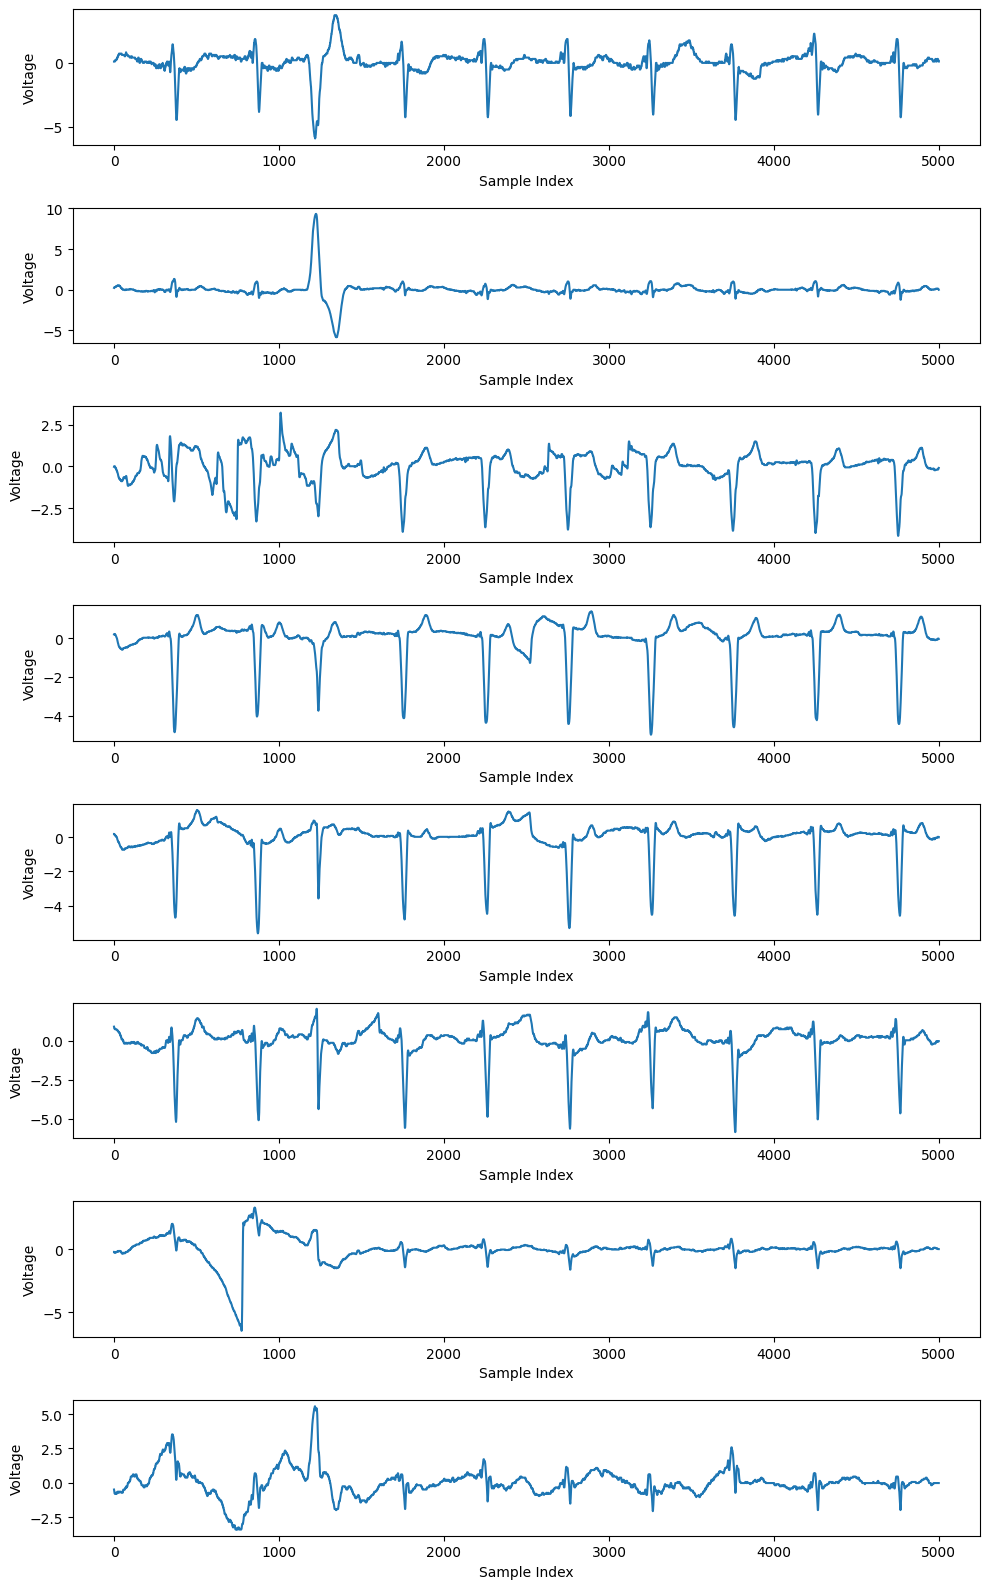

In [37]:
xx = np.load('../data/processed/npy/MUSE_20231120_195019_58000.npy')
plot_data_old(xx)

In [30]:
import matplotlib.pyplot as plt

def plot_data(x, x_filtered):
    # Set up subplots
    fig, axs = plt.subplots(num_leads, 1, figsize=(10, 2*num_leads))
    
    # Plot each lead in a separate subplot
    for i in range(num_leads):
        axs[i].plot(x[i, :], label='Original Signal', color='blue')
        axs[i].plot(x_filtered[i, :], label='Filtered Signal', color='red')

        # # Draw lines connecting corresponding points
        # for j in range(len(x[i, :])):
        #     axs[i].plot([j, j], [x[i, j], x_filtered[i, j]], color='gray', linestyle=':', linewidth=0.5)

        axs[i].set_xlabel('Sample Index')
        axs[i].set_ylabel('Voltage')
        axs[i].legend()  # Show legend

    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

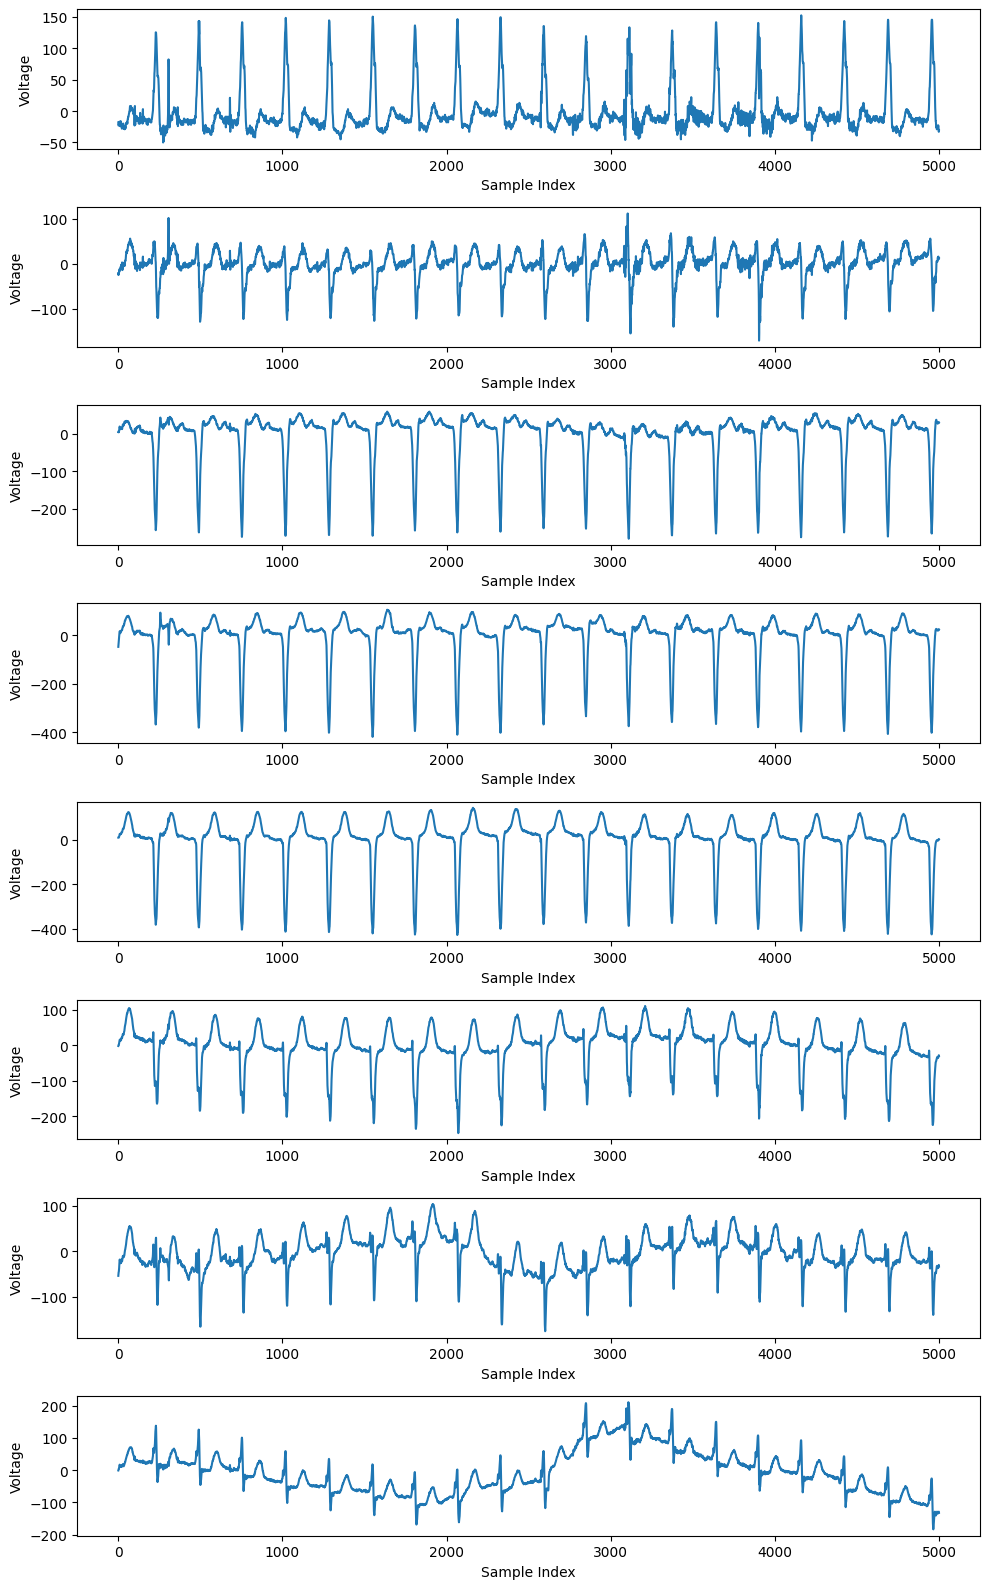

In [31]:
plot_data_old(x)

(8, 5000)


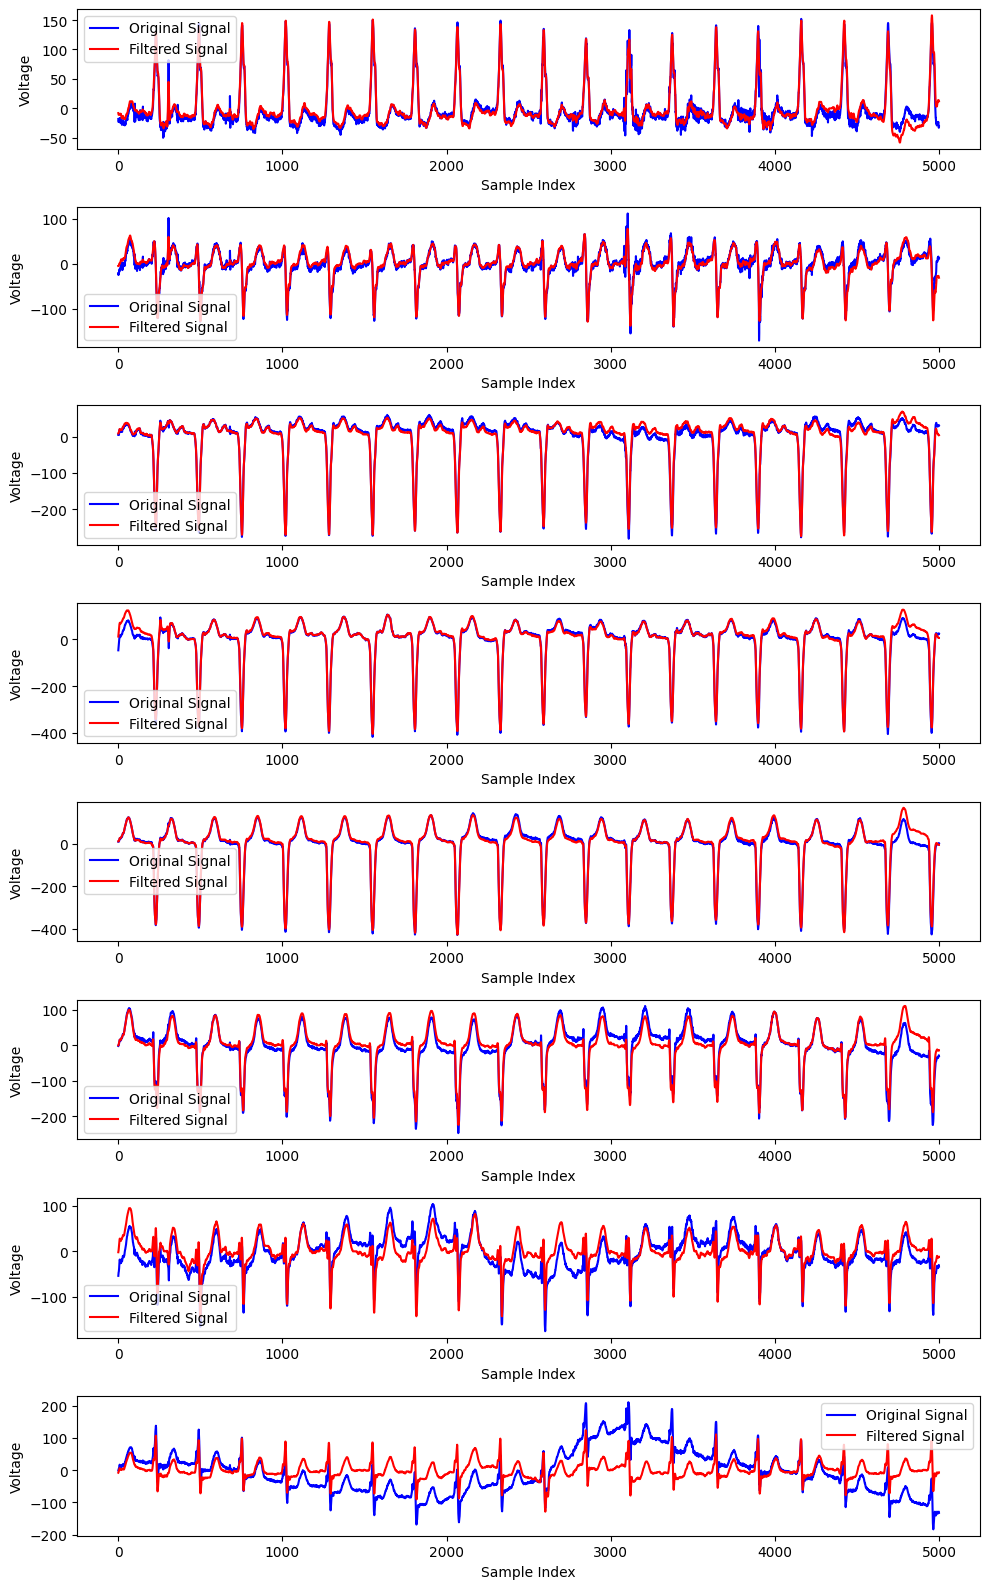

In [32]:
# 1. BPF
from scipy.signal import butter, filtfilt

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

x_bandpass_filter = np.zeros_like(x)
for lead in range(num_leads):
    x_bandpass_filter[lead, :] = bandpass_filter(x[lead, :], lowcut=0.5, highcut=49, fs=fs)

print(x_bandpass_filter.shape)
plot_data(x, x_bandpass_filter)

In [20]:
# # 2. Normalization
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_standardized = scaler.fit_transform(x_bandpass_filter.T).T

# print(x_standardized.shape)
# plot_data_old(x_standardized)
# # plot_data(x_bandpass_filter, x_standardized)

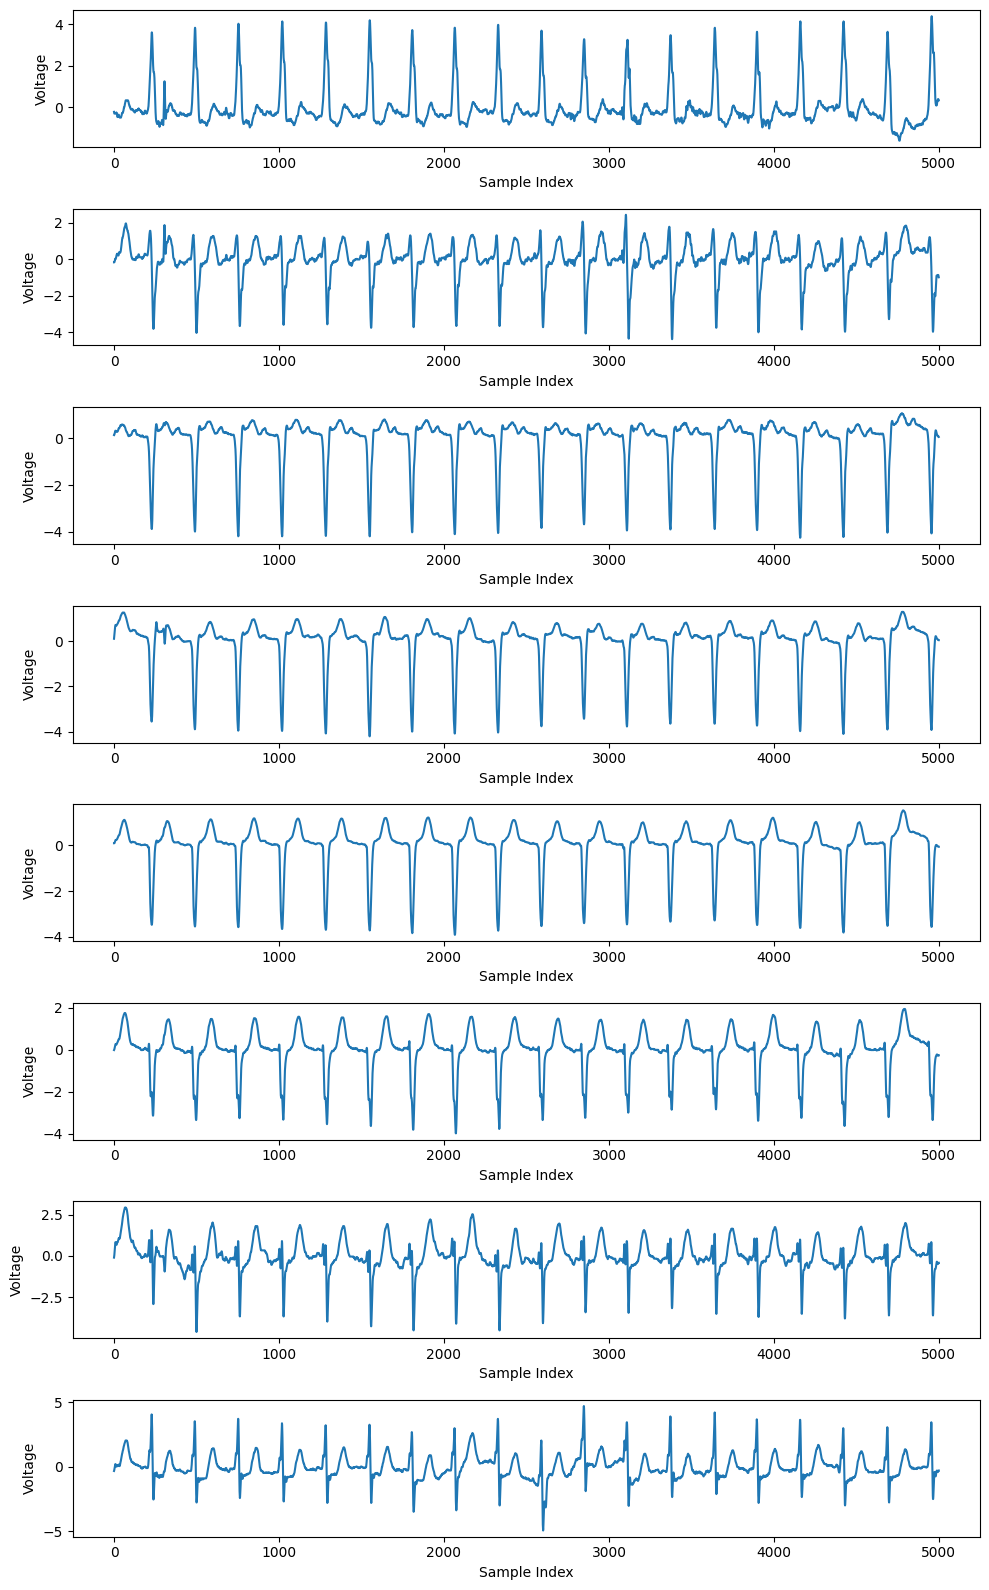

In [33]:
# 3. Standardization
def channelwise_norm(x, eps=1e-8):
    return (x - x.mean(-1, keepdims=True)) / (eps + x.std(-1, keepdims=True))
x_standardized = channelwise_norm(x_bandpass_filter)
plot_data_old(x_standardized)

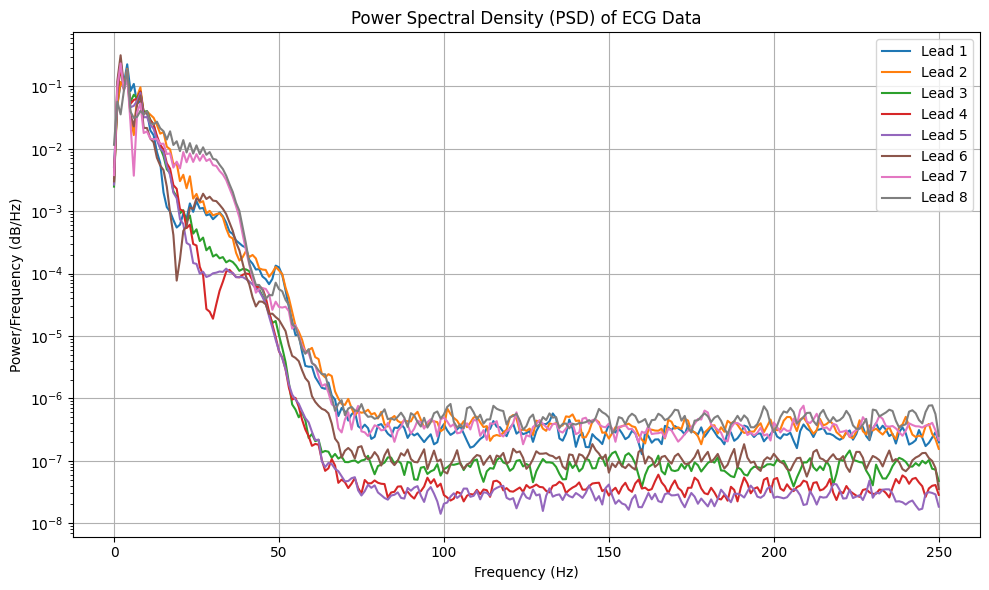

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Frequency range for the PSD plot
frequencies, psd = signal.welch(x_standardized, fs, nperseg=500, axis=1)

# Plotting PSD
plt.figure(figsize=(10, 6))

# Plot the PSD for each lead
for lead in range(x_standardized.shape[0]):
    plt.semilogy(frequencies, psd[lead, :], label=f'Lead {lead + 1}')

# Add labels and title
plt.title('Power Spectral Density (PSD) of ECG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

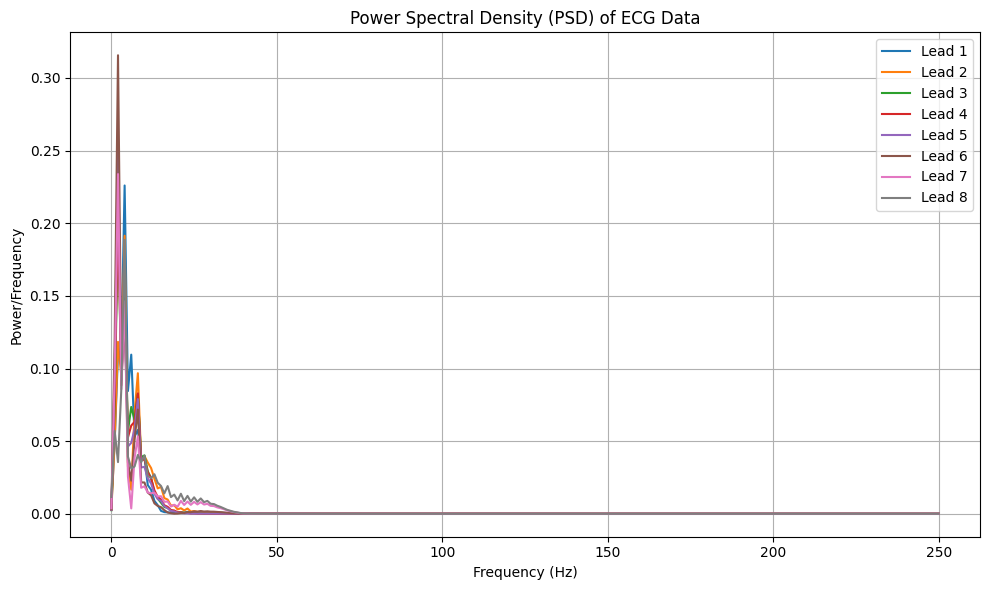

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Frequency range for the PSD plot
frequencies, psd = signal.welch(x_standardized, fs, nperseg=500, axis=1)

# Plotting PSD
plt.figure(figsize=(10, 6))

# Plot the PSD for each lead
for lead in range(x_standardized.shape[0]):
    plt.plot(frequencies, psd[lead, :], label=f'Lead {lead + 1}')

# Add labels and title
plt.title('Power Spectral Density (PSD) of ECG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
# # Define the notch filter parameters
# center_frequency = 50.0  # Center frequency of the notch in Hz
# bandwidth = 1  # Bandwidth of the notch in Hz
# order = 4  # Filter order

# # Design the notch filter
# b, a = signal.iirnotch(center_frequency, bandwidth, fs=fs)

# # Apply the notch filter to the signal
# filtered_signal = signal.filtfilt(b, a, x_standardized)

In [36]:
# from matplotlib.mlab import psd

# # Compute and plot the PSD
# plt.subplot(1, 2, 2)
# power, frequencies = psd(x_standardized[0], NFFT=1024, Fs=500)
# # plt.plot(frequencies, 10 * np.log10(power))
# plt.plot(frequencies, power)
# plt.title('Power Spectral Density')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Power/Frequency (dB/Hz)')

# plt.tight_layout()
# plt.show()